<a href="https://colab.research.google.com/github/Hanyan-Wu/Data-Analysis-Projects/blob/main/Google_Data_Analyst_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Created by Hanyan WU, 09/09/2023

# Case Study: How does a bike-share navigate speedy success? {-}

# Background Information

## Scenario

You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships.

Therefore, your team wants to understand **how casual riders and annual members use Cyclistic bikes differently**. From these insights, your team will **design a new marketing strategy to convert casual riders into annual members**.

But first, Cyclistic executives must approve your recommendations, so they must be backed up with **compelling data insights** and **professional data visualizations**.

## About the company

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.

Until now, Cyclistic’s marketing strategy relied on **building general awareness** and **appealing to broad consumer segments**. One approach that helped make these things possible was the **flexibility of its pricing plans**: single-ride passes, full-day passes, and annual memberships.

Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.

Cyclistic’s finance analysts have concluded that **annual members are much more profitable than casual riders**. Although the pricing flexibility helps Cyclistic attract more customers, Moreno believes that **maximizing the number of annual members** will be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs.

Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members.

In order to do that, however, the marketing analyst team needs to better understand **how annual members and casual riders differ**, **why casual riders would buy a membership**, and **how digital media could affect their marketing tactics**.

Moreno and her team are interested in analyzing the Cyclistic historical bike trip data to identify trends.

# Ask

## Questions

1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

## Task

Moreno has assigned you the first question to answer:

**How do annual members and casual riders use Cyclistic bikes differently?**

You will produce a report with the following deliverables:
1. A clear statement of the business task
2. A description of all data sources used
3. Documentation of any cleaning or manipulation of data
4. A summary of your analysis
5. Supporting visualizations and key findings
6. Your top three recommendations based on your analysis

# Prepare

## Load Data

In [ ]:
import io
import requests

In [ ]:
import pandas as pd
import zipfile

In [ ]:
# Create a list of zip file names

## Initialize list
name_list = []

## Loop through 12 months
for mon in range(1,13):
    name = "2022" + "0"*(1-mon//10) + str(mon) + "-divvy-tripdata"
    name_list.append(name)

name_list

['202201-divvy-tripdata',
 '202202-divvy-tripdata',
 '202203-divvy-tripdata',
 '202204-divvy-tripdata',
 '202205-divvy-tripdata',
 '202206-divvy-tripdata',
 '202207-divvy-tripdata',
 '202208-divvy-tripdata',
 '202209-divvy-tripdata',
 '202210-divvy-tripdata',
 '202211-divvy-tripdata',
 '202212-divvy-tripdata']

In [ ]:
# Create a list of csv file names

## Initialize list
csv_list = name_list.copy()

## September csv file has a different name
csv_list[8] = "202209-divvy-publictripdata"

csv_list

['202201-divvy-tripdata',
 '202202-divvy-tripdata',
 '202203-divvy-tripdata',
 '202204-divvy-tripdata',
 '202205-divvy-tripdata',
 '202206-divvy-tripdata',
 '202207-divvy-tripdata',
 '202208-divvy-tripdata',
 '202209-divvy-publictripdata',
 '202210-divvy-tripdata',
 '202211-divvy-tripdata',
 '202212-divvy-tripdata']

In [ ]:
# Define load csv function
def load_csv(name):

    index = name_list.index(name)

    # Find the zipfile
    url = "https://divvy-tripdata.s3.amazonaws.com/" + name + ".zip"
    # Download zipfile
    zip_content = requests.get(url).content

    # Read the csv file inside the zip file
    with zipfile.ZipFile(io.BytesIO(zip_content)) as z:
        # Open zip from memory
        with z.open( csv_list[index] + ".csv") as csv_file:
            # Load csv into dataframe
            df = pd.read_csv(csv_file)

    return df

In [ ]:
# Collect all the dataframes
## Initialize list of Dataframes
df_list = []

## Loop through the months
for name in name_list:
    df_list.append(load_csv(name))

0
1
2
3
4
5
6
7
8
9
10
11


## Merge Data

In [ ]:
tripdata = pd.concat(df_list, ignore_index = True)
tripdata

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5667712,43ABEE85B6E15DCA,classic_bike,2022-12-05 06:51:04,2022-12-05 06:54:48,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member
5667713,F041C89A3D1F0270,electric_bike,2022-12-14 17:06:28,2022-12-14 17:19:27,Bernard St & Elston Ave,18016,Seeley Ave & Roscoe St,13144,41.949980,-87.714019,41.943403,-87.679618,member
5667714,A2BECB88430BE156,classic_bike,2022-12-08 16:27:47,2022-12-08 16:32:20,Wacker Dr & Washington St,KA1503000072,Green St & Madison St,TA1307000120,41.883143,-87.637242,41.881859,-87.649264,member
5667715,37B392960E566F58,classic_bike,2022-12-28 09:37:38,2022-12-28 09:41:34,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member


In [ ]:
# # Output and save locally
# tripdata.to_csv('D:/Coursera/Google Data Analytics/08 Capstone/Data/Tripdata.csv', index = False)

This dataframe contains the `cyclist trip data` ranging from `Jan 2022` to `Dec 2022`. It has `5,667,717` lines of entry and `13` variables stating the bicycle type,riding time, riding start and end station, latitude and longtitude of stations, the customer type, etc.

# Process

## Credibility Check

In [ ]:
tripdata.shape

(5667717, 13)

In [ ]:
# Remove duplicates, if any
tripdata.duplicated().sum()

0

Looks like all entries are unique, no duplicates.

In [ ]:
# Check the data type of columns
tripdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5667717 entries, 0 to 5667716
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 562.1+ MB


In [ ]:
tripdata.describe()

,start_lat,start_lng,end_lat,end_lng
count,5.667717e+06,5.667717e+06,5.661859e+06,5.661859e+06
mean,4.190222e+01,-8.764783e+01,4.190242e+01,-8.764790e+01
std,4.626109e-02,2.999925e-02,6.805821e-02,1.082985e-01
min,4.164000e+01,-8.784000e+01,0.000000e+00,-8.814000e+01
25%,4.188103e+01,-8.766154e+01,4.188103e+01,-8.766260e+01
50%,4.190000e+01,-8.764410e+01,4.190000e+01,-8.764414e+01
75%,4.193000e+01,-8.762957e+01,4.193000e+01,-8.762963e+01
max,4.563503e+01,-7.379648e+01,4.237000e+01,0.000000e+00


Within the 13 columns, there are 9 string variables and 4 numerical variables.

In [ ]:
# Check if there're nulls
tripdata.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    833064
start_station_id      833064
end_station_name      892742
end_station_id        892742
start_lat                  0
start_lng                  0
end_lat                 5858
end_lng                 5858
member_casual              0
dtype: int64

It seems that about 16% missing in the name and id of starting or ending station, but luckily the coordinates are mostly present, with only 0.1% missing.

We are still able to calculate the approximate distance of the rides based on coordinates. To best utilize all data points, only drop the rows with NAs in columns `end_lat` and `end_lng`.

In [ ]:
tripdata.dropna(subset=["end_lat", "end_lng"], inplace=True)

In [ ]:
tripdata.shape

(5661859, 13)

See that `5,858` lines of entry are dropped.

# Analyze

## Data Transformation

### Which DAY is it? - Generate `day_of_week`

In [ ]:
# Determine the day of week based on the start time of the ride
tripdata["day_of_week"] = pd.to_datetime(tripdata["started_at"]).dt.day_name()

In [ ]:
tripdata["day_of_week"].describe(include='all')

count      5661859
unique           7
top       Saturday
freq        915263
Name: day_of_week, dtype: object

### Is it during the RUSH HOUR? - Generate `start_hour` and `is_rush`

In [ ]:
# Determine the hour of the day based on start time
tripdata["start_hour"] = pd.to_datetime(tripdata["started_at"]).dt.hour

In [ ]:
tripdata["start_hour"].head(10)

0    11
1     8
2     4
3     0
4     1
5    18
6    18
7    12
8     7
9    15
Name: start_hour, dtype: int64

In [ ]:
# If start in rush hours or not
## Initially set all to 0 - not in rush hour
tripdata["is_rush"] = 0

## Then see if the hour value falls into 7-9 and 16-18
tripdata.loc[((tripdata["start_hour"] >= 7) & (tripdata["start_hour"] <= 9)) | ((tripdata["start_hour"] >= 16) & (tripdata["start_hour"] <= 18)), 'is_rush'] = 1

In [ ]:
tripdata["is_rush"].head(10)

0    0
1    1
2    0
3    0
4    0
5    1
6    1
7    0
8    1
9    0
Name: is_rush, dtype: int64

### Which MONTH is it? - Generate `month`

In [ ]:
# Generate the month variable based on start time
tripdata["month"] = pd.to_datetime(tripdata["started_at"]).dt.month

In [ ]:
tripdata["month"].describe()

count    5.661859e+06
mean     7.112207e+00
std      2.531593e+00
min      1.000000e+00
25%      5.000000e+00
50%      7.000000e+00
75%      9.000000e+00
max      1.200000e+01
Name: month, dtype: float64

### How long does the ride last? - Generate `duration`

In [ ]:
# Calculate the duration using the start and end time (in seconds)
tripdata["duration"] = (pd.to_datetime(tripdata["ended_at"]) - pd.to_datetime(tripdata["started_at"])).dt.total_seconds()

In [ ]:
tripdata["duration"].head(10)

0     177.0
1     261.0
2     261.0
3     896.0
4     362.0
5     202.0
6     994.0
7     724.0
8    1527.0
9     443.0
Name: duration, dtype: float64

### What is the DISTANCE of the ride? - Generate `distance`

*Note that here I use the globe distance between the starting point and the ending point. This is only a proxy of the actual distance, as the itinerary is not given.*

In [ ]:
import numpy as np

In [ ]:
# Define the function to calculate distance
def haversine(lat1, lon1, lat2, lon2):
    # Radius of Earth in kilometers
    R = 6371.0

    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Differences
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Haversine formula
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    # Distance in kilometers
    distance = R * c

    return distance

In [ ]:
tripdata["distance"] = haversine(tripdata["start_lat"],
                                 tripdata["start_lng"],
                                 tripdata["end_lat"],
                                 tripdata["end_lng"]
                                )

In [ ]:
tripdata["distance"].head(10)

0    0.699547
1    0.694322
2    1.000832
3    2.462779
4    0.814538
5    0.846501
6    2.988860
7    2.118014
8    2.768706
9    0.959914
Name: distance, dtype: float64

## Keep the necessary columns for Analysis

In [ ]:
trip_clean = tripdata.copy().drop(columns=["started_at", "ended_at", "start_station_name", "start_station_id",
                             "end_station_name", "end_station_id", "start_lat", "start_lng", "end_lat", "end_lng"])

In [ ]:
trip_clean.describe(include='all')

,ride_id,rideable_type,member_casual,day_of_week,start_hour,is_rush,month,duration,distance
count,5661859,5661859,5661859,5661859,5.661859e+06,5.661859e+06,5.661859e+06,5.661859e+06,5.661859e+06
unique,5661859,3,2,7,NaN,NaN,NaN,NaN,NaN
top,C2F7DD78E82EC875,electric_bike,member,Saturday,NaN,NaN,NaN,NaN,NaN
freq,1,2889029,3344996,915263,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,1.422442e+01,3.980929e-01,7.112207e+00,9.796526e+02,2.139447e+00
std,NaN,NaN,NaN,NaN,5.027977e+00,4.895048e-01,2.531593e+00,2.614010e+03,1.183024e+01
min,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,1.000000e+00,-6.212010e+05,0.000000e+00
25%,NaN,NaN,NaN,NaN,1.100000e+01,0.000000e+00,5.000000e+00,3.490000e+02,8.726518e-01
50%,NaN,NaN,NaN,NaN,1.500000e+01,0.000000e+00,7.000000e+00,6.160000e+02,1.574513e+00
75%,NaN,NaN,NaN,NaN,1.800000e+01,1.000000e+00,9.000000e+00,1.105000e+03,2.779437e+00


In [ ]:
# # Output and save locally
# trip_clean.to_csv('D:/Coursera/Google Data Analytics/08 Capstone/Data/Trip_clean.csv', index = False)

# Share

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## Basic Counts

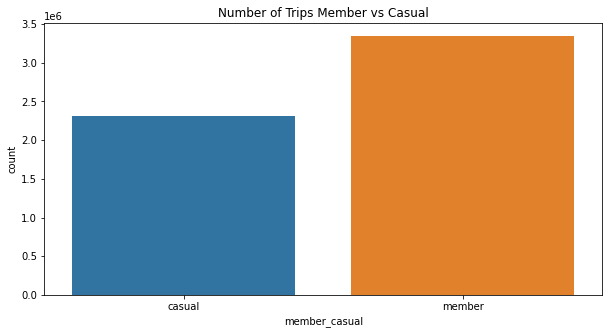

In [ ]:
# Count the number of trips member vs. casual
plt.figure(figsize=(10,5))
sns.countplot(data=trip_clean, x='member_casual')
plt.title('Number of Trips Member vs Casual')
plt.show()

There are approximately 45% more trips made by members than by casual users.

## rideable_type

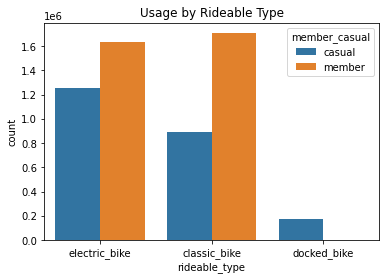

In [ ]:
sns.countplot(data=trip_clean, x='rideable_type', hue='member_casual')
plt.title('Usage by Rideable Type')
plt.show()

Members and casual users both tend to prefer classic and electric bikes to docked ones. But casual users use docked bike more often.

## day_of_week

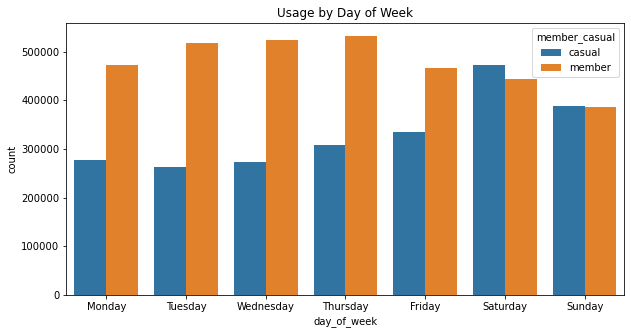

In [ ]:
# Set the order of days
order_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Plot the usage by day of week
plt.figure(figsize=(10,5))
sns.countplot(data=trip_clean, x='day_of_week', hue='member_casual', order=order_days)
plt.title('Usage by Day of Week')
plt.show()

Members usually take trips on weekdays, while casual users' number of trips peak on weekends.

## month

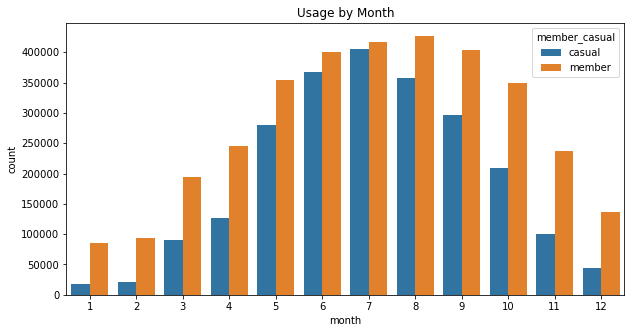

In [ ]:
# Plot the usage by month of year
plt.figure(figsize=(10,5))
sns.countplot(data=trip_clean, x='month', hue='member_casual')
plt.title('Usage by Month')
plt.show()

Casual users and members share a very similar pattern in terms of which month they ride more often. It is intuitive that both type of users ride more from May to October, which is the warmer period for the North pole.

However, the use of bikes for members peak in August while that of casual users peak in July.

## start_hour

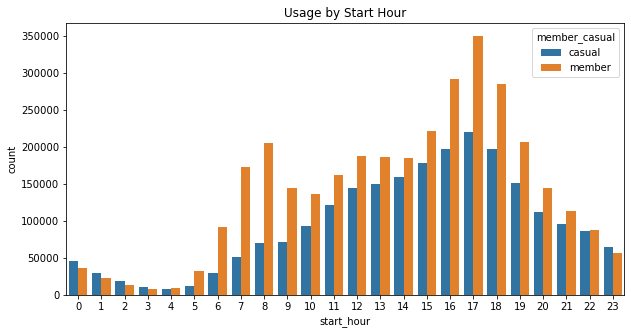

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=trip_clean, x='start_hour', hue='member_casual')
plt.title('Usage by Start Hour')
plt.show()

## is_rush

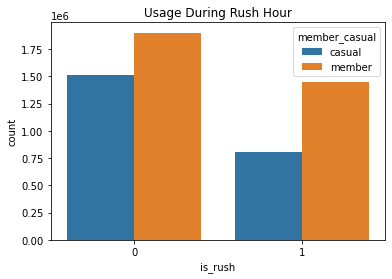

In [ ]:
sns.countplot(data=trip_clean, x='is_rush', hue='member_casual')
plt.title('Usage During Rush Hour')
plt.show()

Almost at any given time period, there are more member use than casual use.

And members use bikes more during the rush hours. The number of trips taken by casual users gradually climb during the daytime and then starts to fall around dusk.

## duration

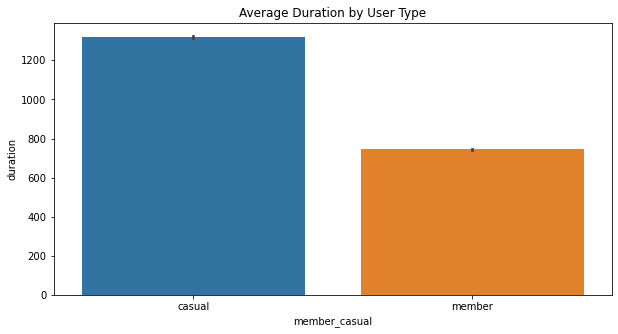

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(data=trip_clean, x='member_casual', y='duration')
plt.title('Average Duration by User Type')
plt.show()

## distance

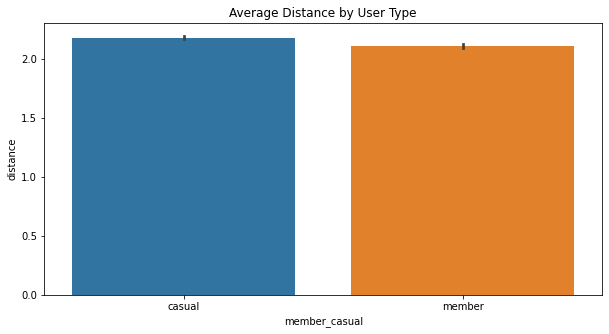

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(data=trip_clean, x='member_casual', y='distance')
plt.title('Average Distance by User Type')
plt.show()

Casual users take longer and farther rides than members.

# Act

Based on the analysis above:

1. the use pattern of members resembles that of workers who go to work by bicycle.

2. And casual users are more likely the ones who take a bike on weekends for a ride.

To convert casual riders into members, I would make the following recommendations:

1. Targeted Weekend Promotions:
    - Given that casual riders tend to rent bikes more during the weekends, run targeted promotions on weekends offering discounts for longer-term membership plans.

2. Seasonal Membership:
    - Offer a seasonal membership at a lower rate that could be updated into a full membership anytime.

3. Upgraded Bikes for Members only:
    - Offer priority  to the access of new bikes to members by placing a members-only restriction on updated bikes.